In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import string

In [77]:
df = pd.read_csv('walk and transit scores.csv')
df = df.drop('Unnamed: 0',axis=1)
df.head(5)

,Area,lat,lon,walk score,transit score
0,Fairfax County Police Department,38.850843,-77.311940,62.0,40.0
1,Fairfax County Police Department,38.857957,-77.316864,79.0,39.0
2,Fairfax County Police Department,38.845568,-77.301112,75.0,39.0
3,Fairfax County Police Department,38.862473,-77.314465,46.0,39.0
4,Fairfax County Police Department,38.861489,-77.286638,52.0,40.0


In [78]:
df.head()
df['Area'].unique()

array(['Fairfax County Police Department', 'Hampton Police Dept',
       'Henrico County Police Dept', 'Loudoun County Sheriff Office',
       'Newport News Police Dept', 'Norfolk Police Dept',
       'Prince William County Police Department',
       'Richmond (City) Bureau Of Police',
       'Spotsylvania County Sheriff Office',
       'Stafford County Sheriff Office', 'Virginia Beach Police Dept',
       'Albemarle ', 'Alexandria Police Dept',
       'Arlington County Police Department', 'Chesapeake Police Dept',
       'Chesterfield County Police Department'], dtype=object)

In [105]:
df['area_fixed'] = df.Area.str.replace(' Police Department' , '')
df['area_fixed'] = df.area_fixed.str.replace(' Sheriff Office' , '')
df['area_fixed'] = df.area_fixed.str.replace(' Police Dept' , '')
df['area_fixed'] = df.area_fixed.str.replace(' Bureau Of Police' , '')
df['area_fixed'] = df.area_fixed.str.replace(' Police Department' , '')
display(df.head())
display(df['area_fixed'].unique())
df.drop('Area',axis=1)

,Area,lat,lon,walk score,transit score,area_fixed
0,Fairfax County Police Department,38.850843,-77.311940,62.0,40.0,Fairfax County
1,Fairfax County Police Department,38.857957,-77.316864,79.0,39.0,Fairfax County
2,Fairfax County Police Department,38.845568,-77.301112,75.0,39.0,Fairfax County
3,Fairfax County Police Department,38.862473,-77.314465,46.0,39.0,Fairfax County
4,Fairfax County Police Department,38.861489,-77.286638,52.0,40.0,Fairfax County


array(['Fairfax County', 'Hampton', 'Henrico County', 'Loudoun County',
       'Newport News', 'Norfolk', 'Prince William County',
       'Richmond (City)', 'Spotsylvania County', 'Stafford County',
       'Virginia Beach', 'Albemarle ', 'Alexandria', 'Arlington County',
       'Chesapeake', 'Chesterfield County'], dtype=object)

,lat,lon,walk score,transit score,area_fixed
0,38.850843,-77.311940,62.0,40.0,Fairfax County
1,38.857957,-77.316864,79.0,39.0,Fairfax County
2,38.845568,-77.301112,75.0,39.0,Fairfax County
3,38.862473,-77.314465,46.0,39.0,Fairfax County
4,38.861489,-77.286638,52.0,40.0,Fairfax County
5,38.846028,-77.288382,61.0,36.0,Fairfax County
6,38.850850,-77.294000,52.0,37.0,Fairfax County
7,38.852702,-77.297812,66.0,38.0,Fairfax County
8,38.858186,-77.314412,75.0,39.0,Fairfax County
9,38.839161,-77.308503,74.0,39.0,Fairfax County


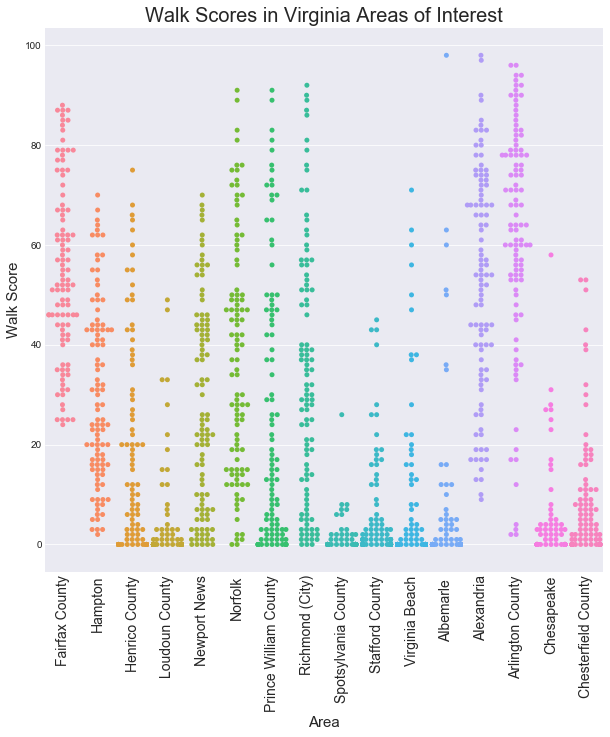

In [116]:
sns.set_style("darkgrid")
plt.subplots(figsize=(10,10))
ax = sns.swarmplot(x="area_fixed", y="walk score", data=df)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, fontsize=14)
plt.title('Walk Scores in Virginia Areas of Interest', size = 20)
plt.xlabel('Area',size = 15)
plt.ylabel('Walk Score',size = 15)
plt.savefig('Walk Scores in Virginia.png')
plt.show()